5 Baris Pertama Data:
         Order ID     Month  Year           City    Segment         Category  \
0  CA-2014-156587     Maret  2014    DKI Jakarta   Consumer        Furniture   
1  CA-2014-156587     Maret  2014     Jawa Barat   Consumer  Office Supplies   
2  CA-2014-152905  Februari  2014         Banten   Consumer  Office Supplies   
3  CA-2014-156587     Maret  2014    Jawa Tengah   Consumer  Office Supplies   
4  CA-2014-157644  Desember  2014  DI Yogyakarta  Corporate       Technology   

  Sub-Category                                       Product Name       Sales  \
0       Chairs         Global Push Button Manager's Chair, Indigo   USD 48,71   
1      Storage            Carina 42"Hx23 3/4"W Media Storage Unit  USD 242,94   
2      Storage                                 Akro Stacking Bins   USD 12,62   
3          Art                                         Newell 330   USD 17,94   
4  Accessories  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   USD 34,77   

   Quantit

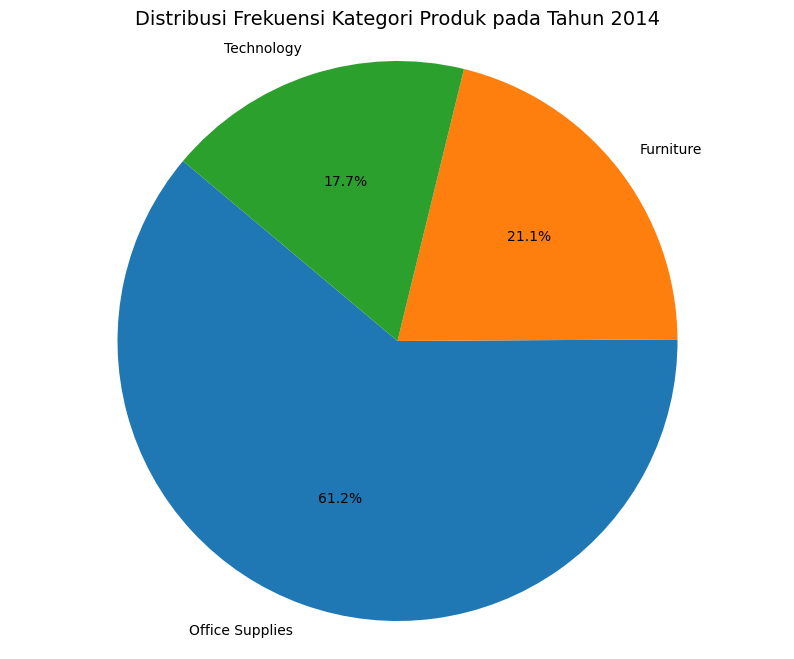

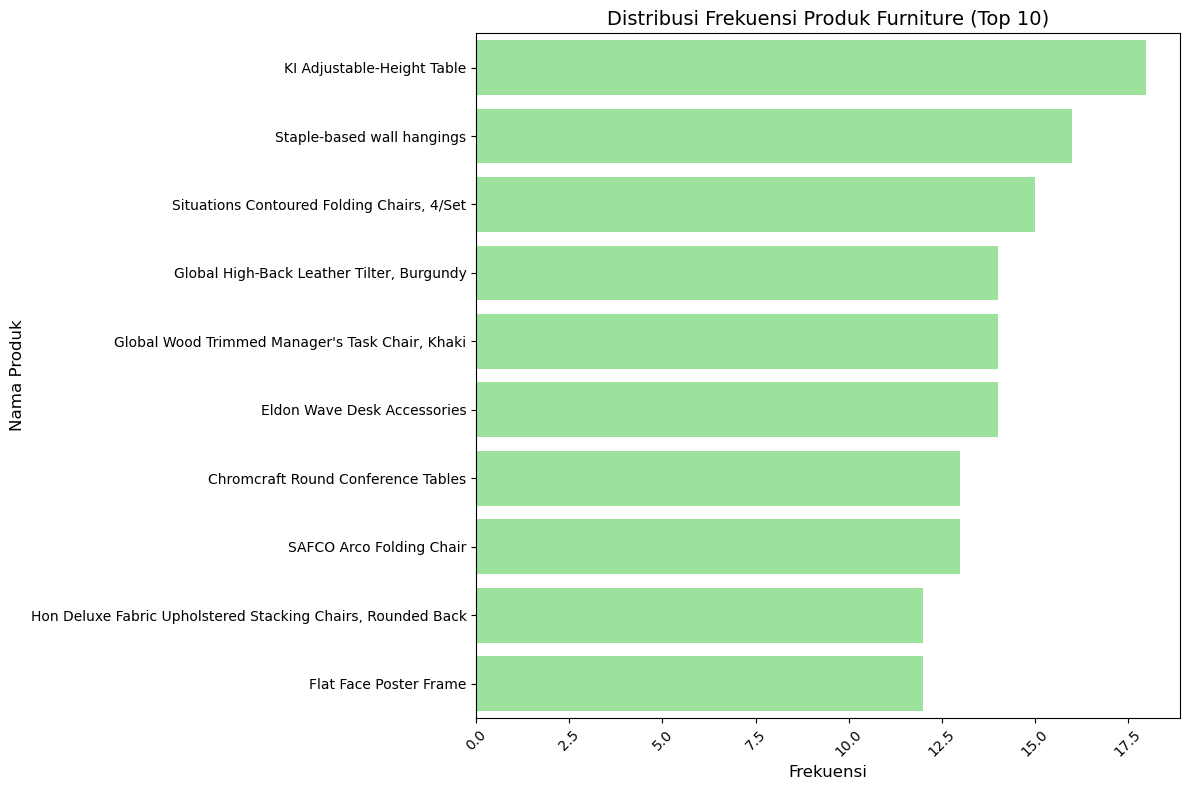

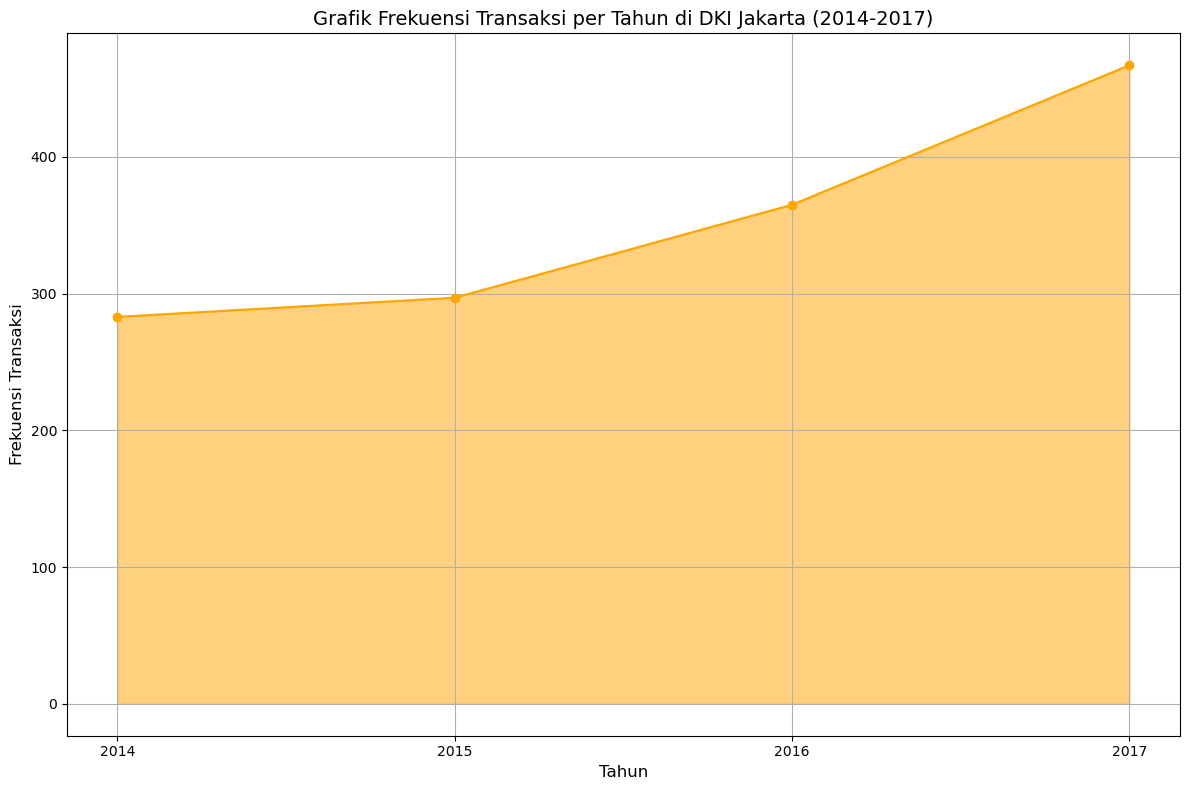

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sesuaikan dengan tempat penyimpanan
file_path = r"D:\DATA LP ASUS\TI Semester 2\Data Sales.csv"

# Coba membaca file dengan beberapa encoding umum
try:
    df = pd.read_csv(file_path, encoding='windows-1252', delimiter=';', on_bad_lines='skip')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';', on_bad_lines='skip')

print("5 Baris Pertama Data:")
print(df.head())
print("\n")

# Pastikan kolom 'Year' bertipe numerik
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 1. Distribusi Frekuensi Kategori Produk pada Tahun 2014
df_2014 = df[df['Year'] == 2014]
category_distribution = df_2014['Category'].value_counts().dropna()
print("1. Distribusi Frekuensi Kategori Produk pada Tahun 2014:")
print(category_distribution.to_string())
print("\n")

# 2. Distribusi Frekuensi Produk dengan Kategori Furniture
df_furniture = df[df['Category'] == 'Furniture']
product_distribution = df_furniture['Product Name'].value_counts().dropna()
print("2. Distribusi Frekuensi Produk dengan Kategori Furniture:")
print(product_distribution.to_string())
print("\n")

# 3. Produk dengan Penjualan Terbanyak pada Kategori Technology
df_technology = df[df['Category'] == 'Technology']
if not df_technology.empty:
    top_selling_product = df_technology['Product Name'].value_counts().idxmax()
    print("3. Produk dengan frekuensi terbanyak pada kategori Technology:")
    print(top_selling_product)
else:
    print("3. Tidak ada data untuk kategori Technology.")
print("\n")

# 4. Grafik Penjualan per Tahun di Kota DKI Jakarta (2014 - 2017)
df_jakarta = df[df['City'] == 'DKI Jakarta']
transactions_per_year = df_jakarta.groupby('Year').size()
print("4. Distribusi Frekuensi Transaksi per Tahun di Kota DKI Jakarta (2014-2017):")
print(transactions_per_year.to_string())
print("\n")

# 5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015
df_2015_corporate = df[(df['Year'] == 2015) & (df['Segment'] == 'Corporate')]
total_corporate_transactions = len(df_2015_corporate)
office_supplies_transactions = len(df_2015_corporate[df_2015_corporate['Category'] == 'Office Supplies'])

if total_corporate_transactions > 0:
    probability = office_supplies_transactions / total_corporate_transactions
    print("5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015:")
    print(f"{probability:.2%}")
else:
    print("5. Tidak ada transaksi Corporate pada tahun 2015.")
print("\n")

# 1. Visualisasi Distribusi Frekuensi Kategori Produk pada Tahun 2014 
plt.figure(figsize=(10, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Frekuensi Kategori Produk pada Tahun 2014', fontsize=14)
plt.axis('equal')  
plt.show()

# 2. Visualisasi Distribusi Frekuensi Produk dengan Kategori Furniture
plt.figure(figsize=(12, 8))
sns.barplot(x=product_distribution.values[:10], 
            y=product_distribution.index[:10], 
            color='lightgreen')  # Ganti warna balok
plt.title('Distribusi Frekuensi Produk Furniture (Top 10)', fontsize=14)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# 3. Visualisasi Grafik Penjualan per Tahun di Kota DKI Jakarta
plt.figure(figsize=(12, 8))
plt.fill_between(transactions_per_year.index, transactions_per_year.values, color='orange', alpha=0.5)
plt.plot(transactions_per_year.index, transactions_per_year.values, marker='o', color='orange')  # Garis
plt.title('Grafik Frekuensi Transaksi per Tahun di DKI Jakarta (2014-2017)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Frekuensi Transaksi', fontsize=12)
plt.xticks(transactions_per_year.index)
plt.grid()
plt.tight_layout()  
plt.show()